In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import copy

from load_data import load_expression, load_dataset
from model import SpiceMix
from Result import SpiceMixResult

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: flex;
    justify-content: center;
}
</style>
""")

In [3]:
import h5py

In [4]:
with h5py.File("../../data/aggregate_separate_fovs/results_with_spatial.hdf5", 'r') as h5file:
    print(h5file["weights"]["0"].keys())

<KeysViewHDF5 ['0', '10', '100', '110', '120', '130', '140', '150', '160', '170', '180', '190', '20', '200', '210', '220', '230', '240', '250', '260', '270', '30', '40', '50', '60', '70', '80', '90']>


In [5]:
cardiac_development_spatial_result = SpiceMixResult(
    path2dataset='../../data/aggregate_separate_fovs',
    result_filename="../../data/aggregate_separate_fovs/results_with_spatial.hdf5",
    neighbor_suffix="",
)

cardiac_development_nmf_result = SpiceMixResult(
    path2dataset='../../data/aggregate_separate_fovs',
    result_filename="../../data/aggregate_separate_fovs/results_no_spatial.hdf5",
    neighbor_suffix="",
)

Result file = ../../data/aggregate_separate_fovs/results_with_spatial.hdf5


/work/magroup/shahula/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:112: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Result file = ../../data/aggregate_separate_fovs/results_no_spatial.hdf5


Found 269 iterations from ../../data/aggregate_separate_fovs/results_with_spatial.hdf5
Found 308 iterations from ../../data/aggregate_separate_fovs/results_no_spatial.hdf5


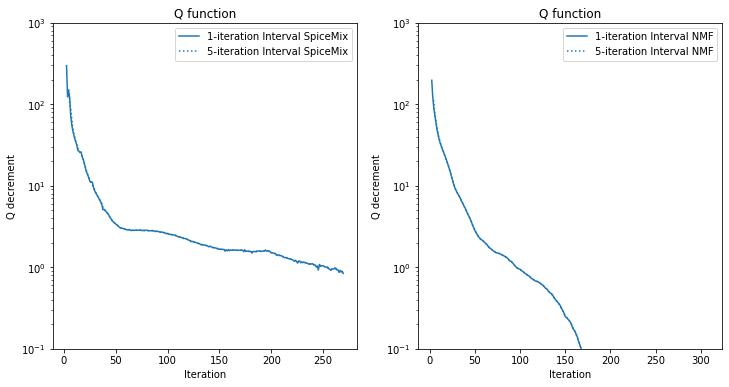

In [6]:
# Prior to downstream analysis, we should make sure the models have converged
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
cardiac_development_spatial_result.plot_convergence(axes[0], label='SpiceMix', c='C0')
cardiac_development_nmf_result.plot_convergence(axes[1], label='NMF', c='C0')
for ax in axes.flat:
    ax.set_title('Q function')
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Q decrement')
    ax.set_yscale('log')
    ax.set_ylim(10**-1, 10**3)
    ax.legend()

In [7]:
# Load latent states for all cells estimated by the last iteration of SpiceMix/NMF
cardiac_development_spatial_result.load_latent_states(iiter=-1)
cardiac_development_nmf_result.load_latent_states(iiter=-1)

Iteration -1


/work/magroup/shahula/spatiotemporal_cardiac/spicemix_test/SpiceMix/SpiceMix/util.py:112: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  ans[key] = item.value


Iteration -1


optimal K = 7
#clusters = 7, #-1 = 0
optimal K = 10
#clusters = 10, #-1 = 0


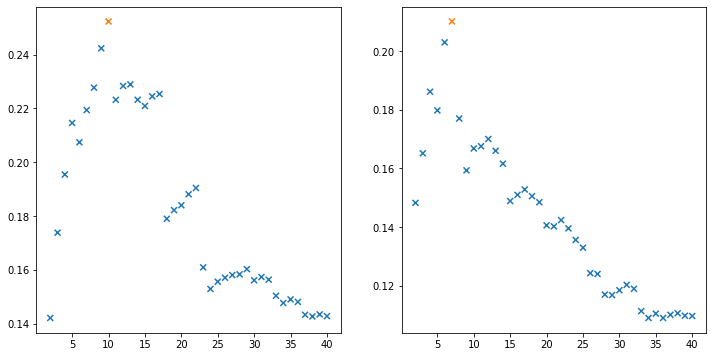

In [8]:
# Do hierarchical clustering on ALL cells in the latent space
# TODO: accelerate this function for datasets of 10k+ cells 
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
cardiac_development_nmf_result.determine_optimal_clusters(axes[1], K_range=np.arange(2, 41))
cardiac_development_spatial_result.determine_optimal_clusters(axes[0], K_range=np.arange(2, 41))

<AxesSubplot:xlabel='x', ylabel='y'>

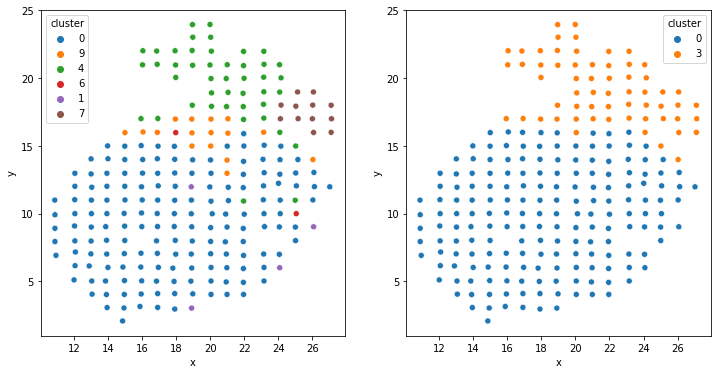

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.scatterplot(ax=axes[0], x='x',y='y',hue='cluster',data=cardiac_development_spatial_result.data.groupby("replicate").get_group(b"13"),
               legend="full")
sns.scatterplot(ax=axes[1], x='x',y='y',hue='cluster',data=cardiac_development_nmf_result.data.groupby("replicate").get_group(b"13"),
               legend="full")

In [10]:
# Assign a name (a str) to each raw cluster (a natural number starting from 0)
# To merge raw clusters, assign the same name to them
obj_SpiceMix.annotateClusters({
    8: 'NA', 9: 'HPC', 0: 'eL2/3', 6: 'eL4', 10: 'eL5', 12: 'eL6a', 7: 'eL6b', 3: 'eL6c',
    16: 'PVALB', 13: 'SST', 4: 'VIP',
    2: 'Astro', 5: 'Astro/Oligo', 1: 'Oligo-1', 14: 'Oligo-2', 11: 'SMC', 15: 'Endo',
})

# Assign a custom color to each cluster
obj_SpiceMix.assignColors('cluster', {
    'NA': 'black',
    'HPC': 'sandybrown', 'eL2/3': 'lightskyblue', 'eL4': 'mediumspringgreen',
    'eL5': 'palegreen', 'eL6a': 'greenyellow', 'eL6b': 'darkseagreen', 'eL6c': 'burlywood',
    'PVALB': 'orangered', 'SST': 'firebrick', 'VIP': 'gold',
    'Astro': 'mediumorchid', 'Astro/Oligo': 'magenta', 'Oligo-1': 'palegoldenrod',
    'Oligo-2': 'gainsboro', 'SMC': 'teal', 'Endo': 'darkslateblue',
})

# Assign a custom order to a particular label for visualization
obj_SpiceMix.assignOrder('cluster', [
    'NA', 'HPC', 'eL2/3', 'eL4', 'eL5', 'eL6a', 'eL6b', 'eL6c', 'PVALB', 'SST', 'VIP',
    'Astro', 'Astro/Oligo', 'Oligo-1', 'Oligo-2', 'SMC', 'Endo', 
])

# obj_SpiceMix.assignOrder('cell type', [
#     'HPC', 'eL2/3', 'eL4', 'eL5', 'eL6-1', 'eL6-2', 'PVALB', 'SST', 'VIP', 'Reln',
#     'Astro-1', 'Astro-2', 'Oligo', 'Smc', 'Endo', 'Micro',
# ])

# # May also assign an order to replicates
# obj_SpiceMix.assignOrder('repli', ['visual_1020_20180410-BY3_1kgenes'])


NameError: name 'obj_SpiceMix' is not defined

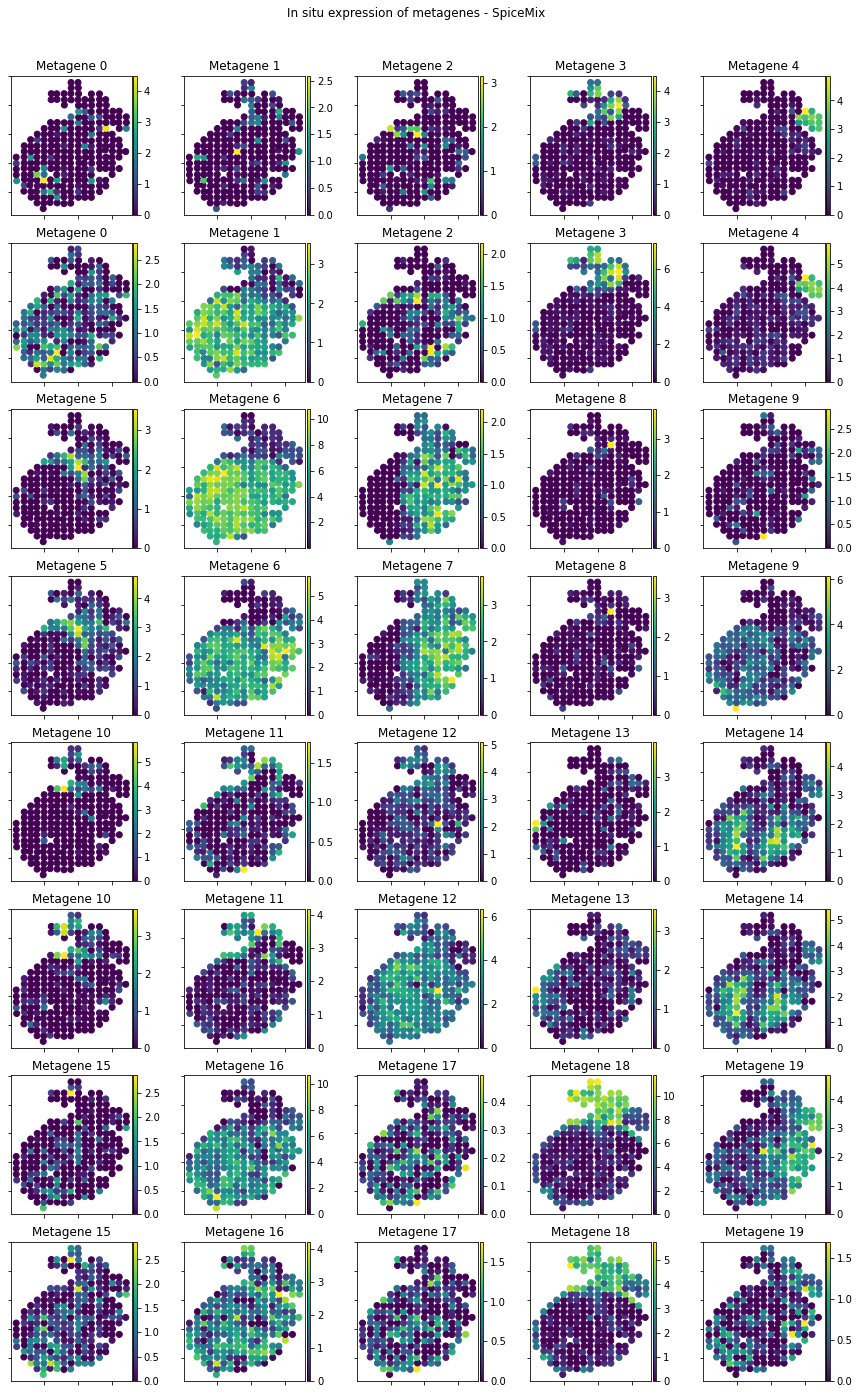

In [14]:
# We ovrlap latent states on the spatial space
# SpiceMix metagenes are expected to show clearer spatial patterns with less background expressions
segmentdata = copy.deepcopy(plt.get_cmap('Reds')._segmentdata)
segmentdata['red'  ][0] = (0., 1., 1.)
segmentdata['green'][0] = (0., 1., 1.)
segmentdata['blue' ][0] = (0., 1., 1.)
cmap = LinearSegmentedColormap('', segmentdata=segmentdata, N=256)

fig, axes = plt.subplots(8, 5, figsize=(15, 24))
fig.suptitle('In situ expression of metagenes - SpiceMix', y=.92)
cardiac_development_spatial_result.plot_metagenes(axes[[0, 2, 4, 6]], s=1, cmap=cmap, replicate=b"13")
cardiac_development_nmf_result.plot_metagenes(axes[[1, 3, 5, 7]], s=1, cmap=cmap, replicate=b"13")
plt.show()

In [11]:
# do dimension reduction by UMAP
kwargs=dict(
    n_components=2,
    n_neighbors=30,
    min_dist=0.2,
    random_state=0,
)
obj_SpiceMix.UMAP(**kwargs)
obj_NMF     .UMAP(**kwargs)
# This is a wrapper of UMAP.umap
# Results are stored in columns 'UMAP 1', 'UMAP 2', and so on

Text(0.5, 1.0, 'Replicates')

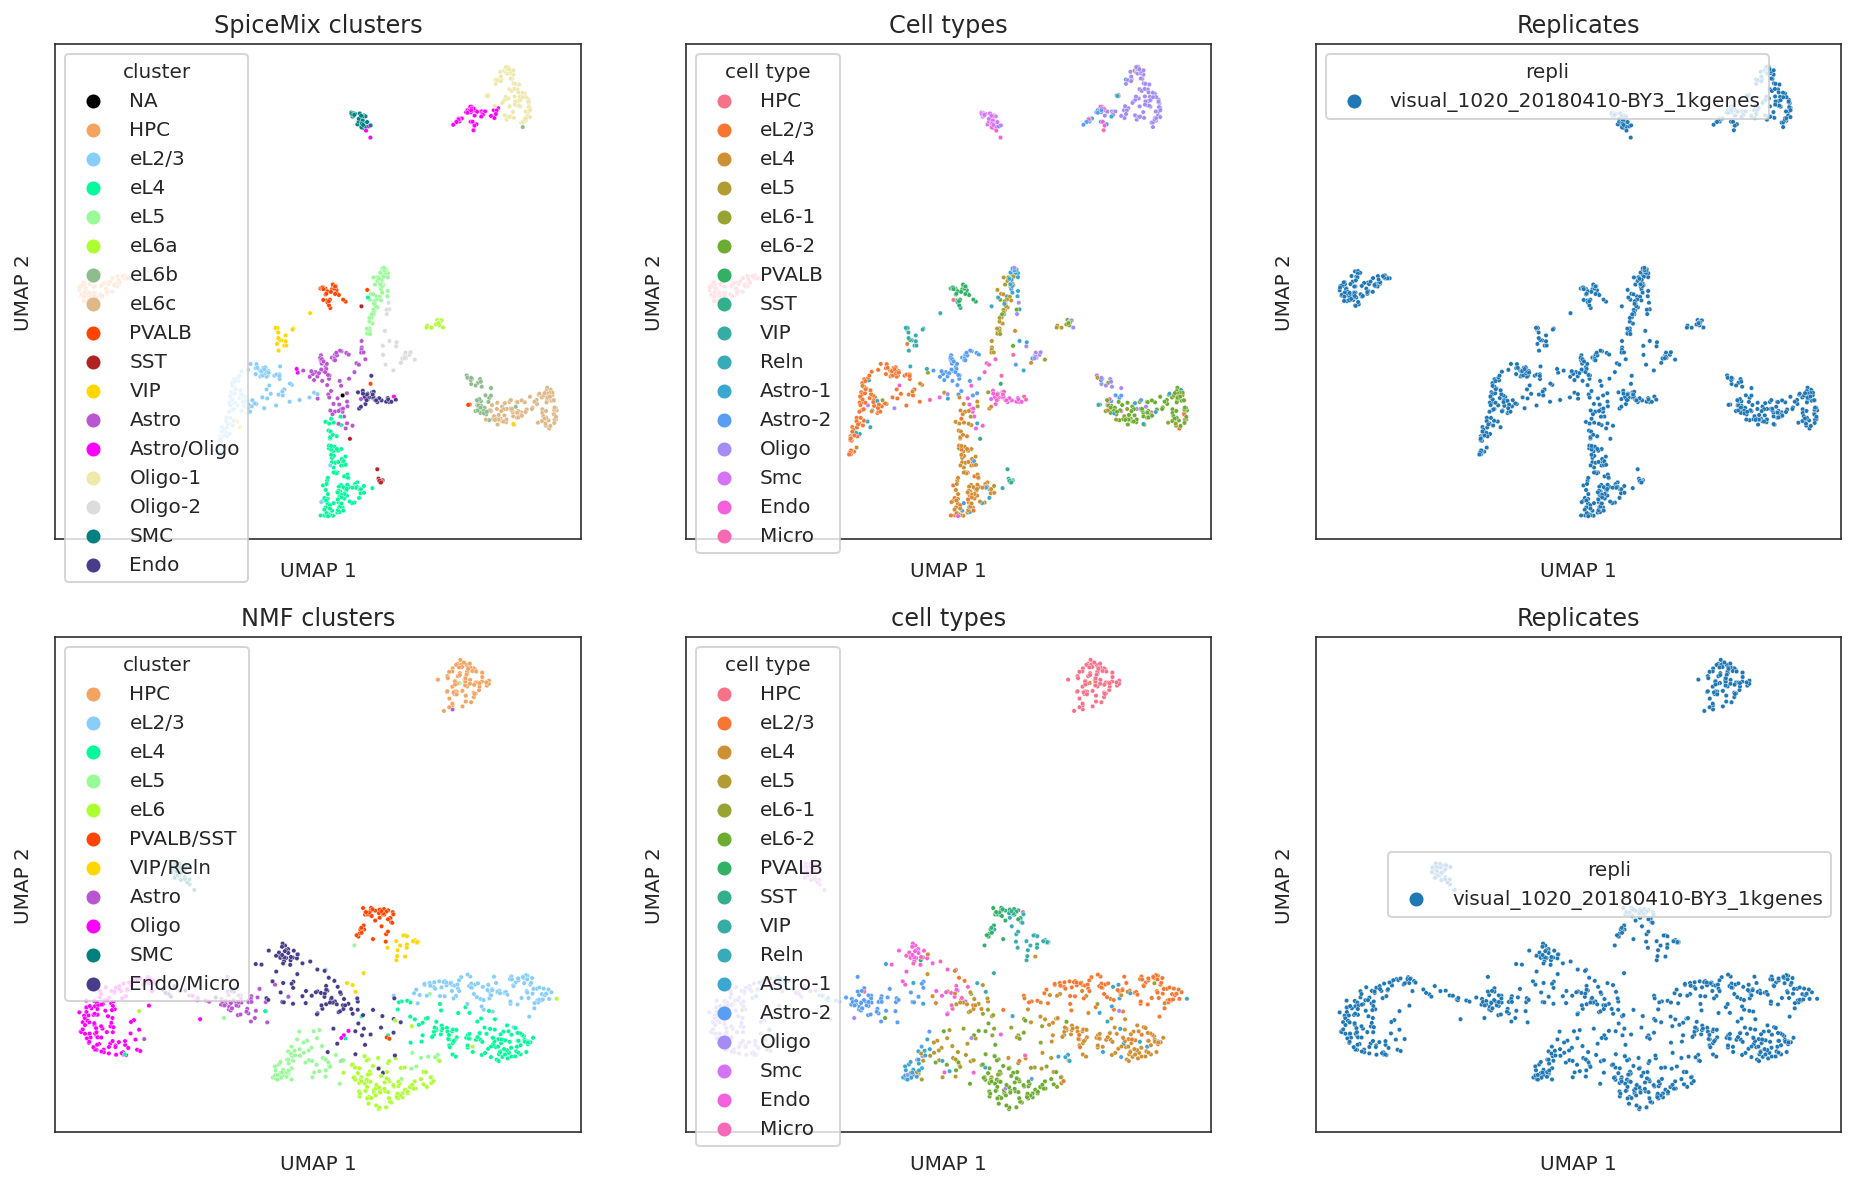

In [12]:
# Visualize cells in the latent space colored by
#   SpiceMix/NMF clusters (cluster)
#   cell types from the original analysis (cell type)
#   replicates (repli)
# Result.visualizeFeaturesSpace is a wraper of Result.visualizeFeatureSpace and handles the custom order of metagenes
kwargs = dict(s=5)
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
obj_SpiceMix.visualizeFeatureSpace(axes[0, 0], 'cluster'  , key_x='UMAP 1', key_y='UMAP 2', **kwargs)
obj_SpiceMix.visualizeFeatureSpace(axes[0, 1], 'cell type', key_x='UMAP 1', key_y='UMAP 2', **kwargs)
obj_SpiceMix.visualizeFeatureSpace(axes[0, 2], 'repli'    , key_x='UMAP 1', key_y='UMAP 2', **kwargs)
obj_NMF.visualizeFeaturesSpace(
    axes[1], ['cluster', 'cell type', 'repli'],
    key_x='UMAP 1', key_y='UMAP 2', **kwargs,
)
axes[0, 0].set_title('SpiceMix clusters')
axes[0, 1].set_title('Cell types')
axes[0, 2].set_title('Replicates')
axes[1, 0].set_title('NMF clusters')
axes[1, 1].set_title('cell types')
axes[1, 2].set_title('Replicates')

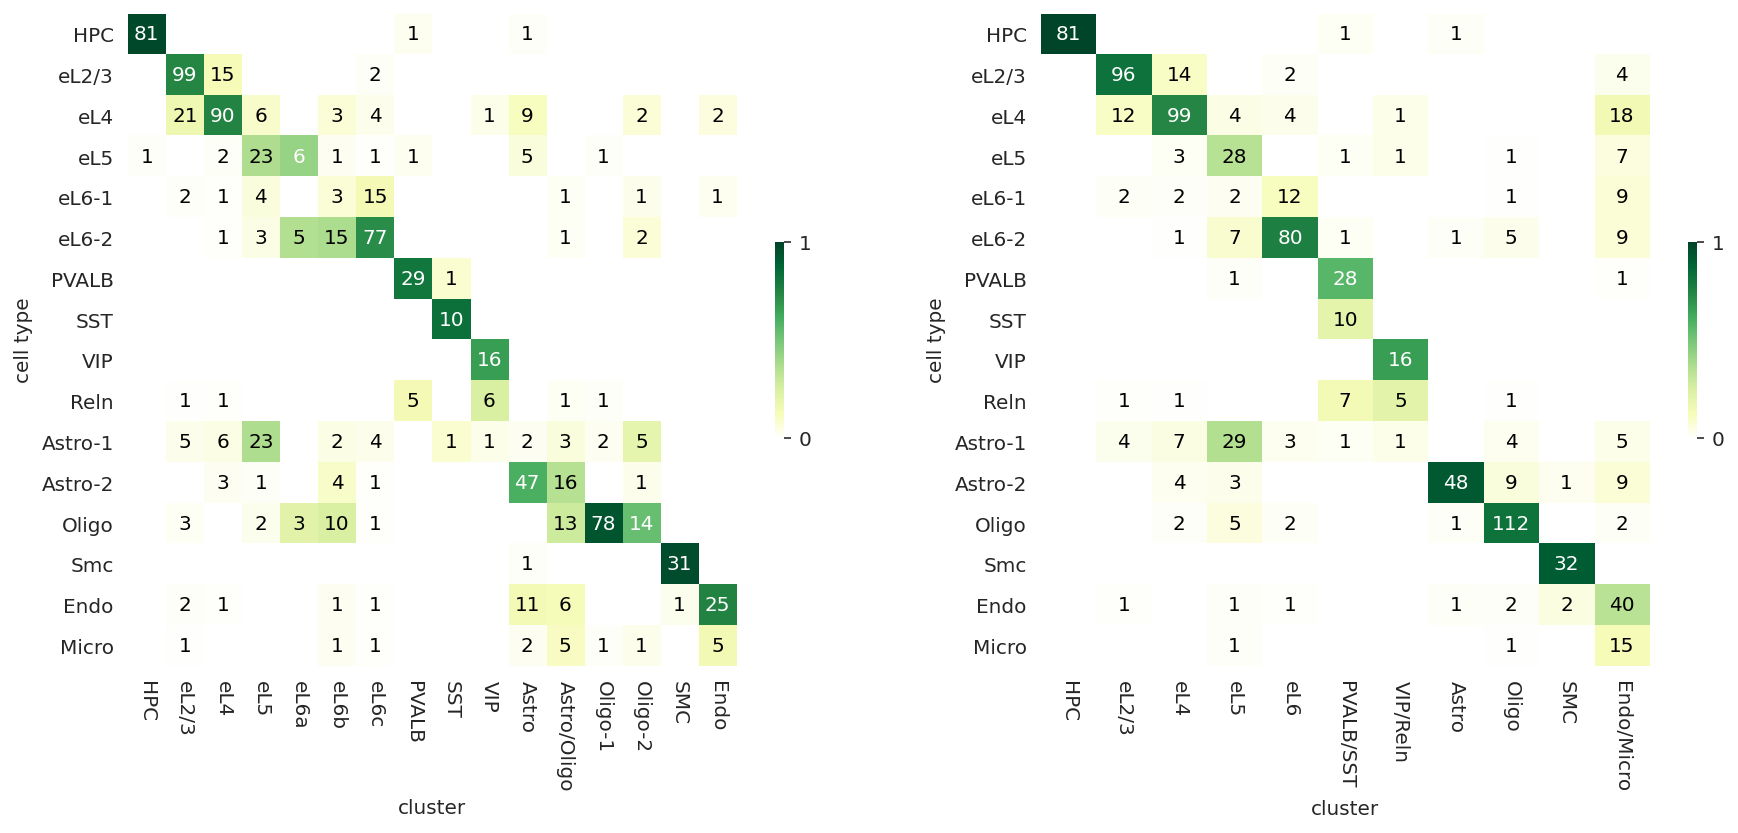

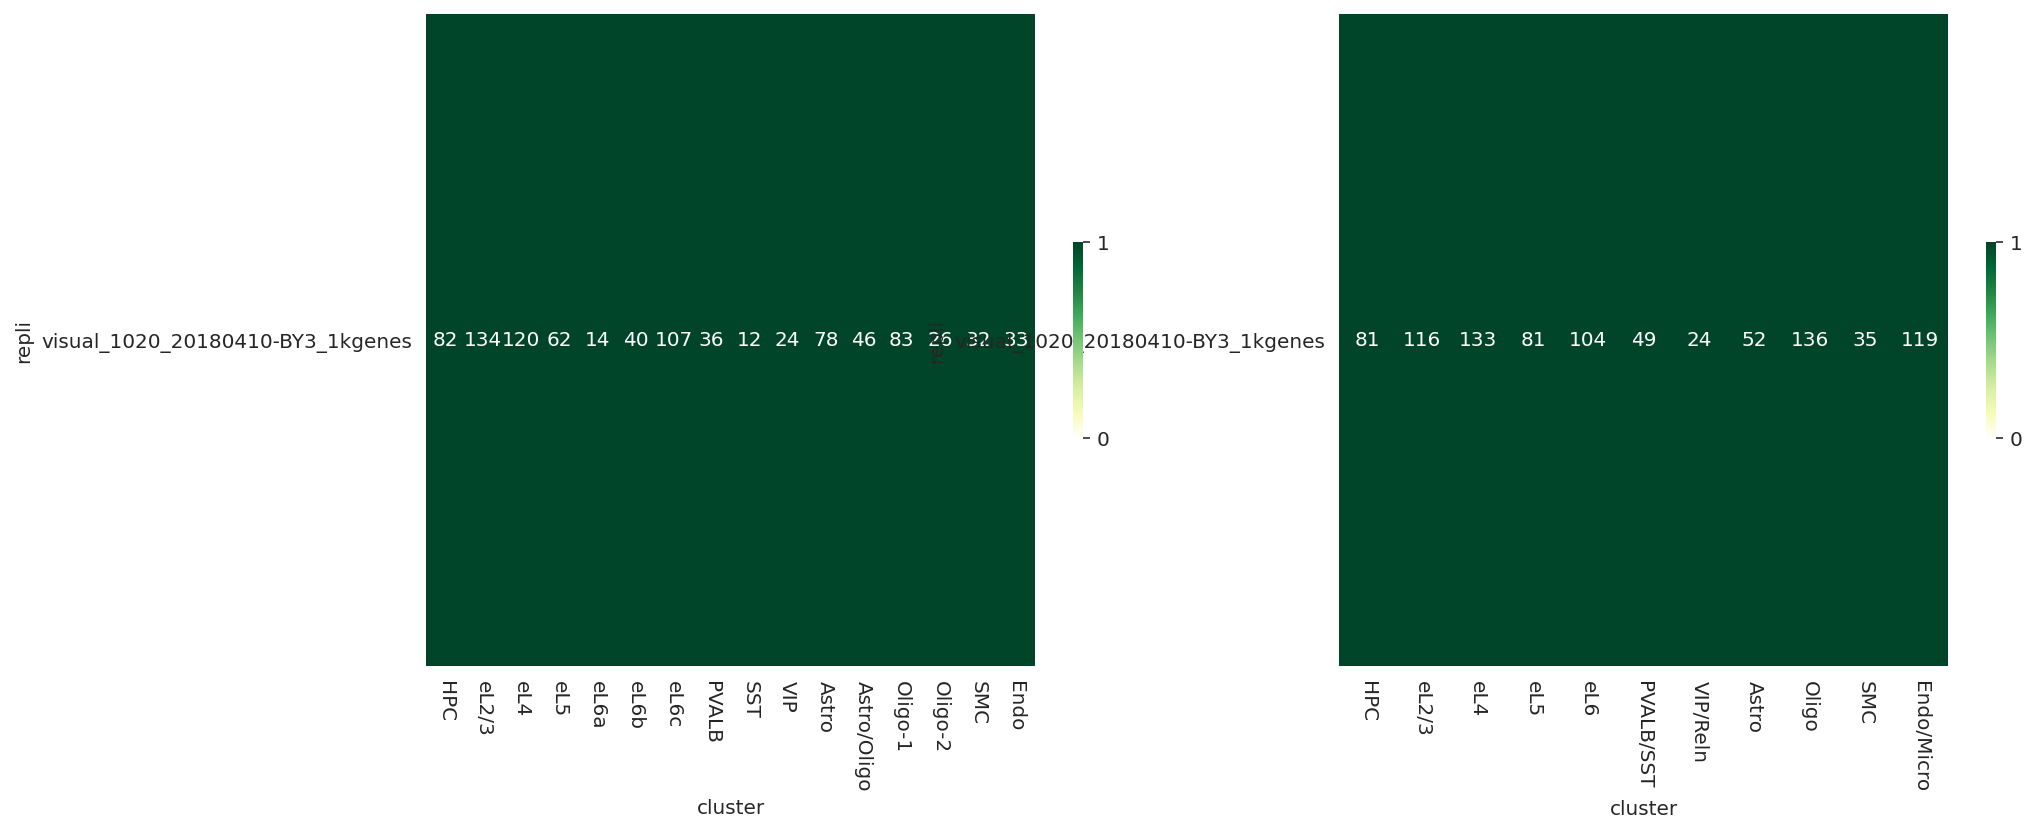

In [13]:
segmentdata = copy.deepcopy(plt.get_cmap('YlGn')._segmentdata)
segmentdata['red'  ][0] = (0., 1., 1.)
segmentdata['green'][0] = (0., 1., 1.)
segmentdata['blue' ][0] = (0., 1., 1.)
cm = matplotlib.colors.LinearSegmentedColormap('', segmentdata=segmentdata, N=256)
kwargs = dict(
    cmap=cm,
)

# compare SpiceMix/NMF clusters with the cell types from the original analysis
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
obj_SpiceMix.visualizeLabelEnrichment(axes[0], **kwargs, ignores_x={'NA'})
obj_NMF     .visualizeLabelEnrichment(axes[1], **kwargs)

# the distribution of SpiceMix/NMF clusters in different replicates
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
obj_SpiceMix.visualizeLabelEnrichment(axes[0], **kwargs, key_x='cluster', key_y='repli', ignores_x={'NA'})
obj_NMF     .visualizeLabelEnrichment(axes[1], **kwargs, key_x='cluster', key_y='repli')

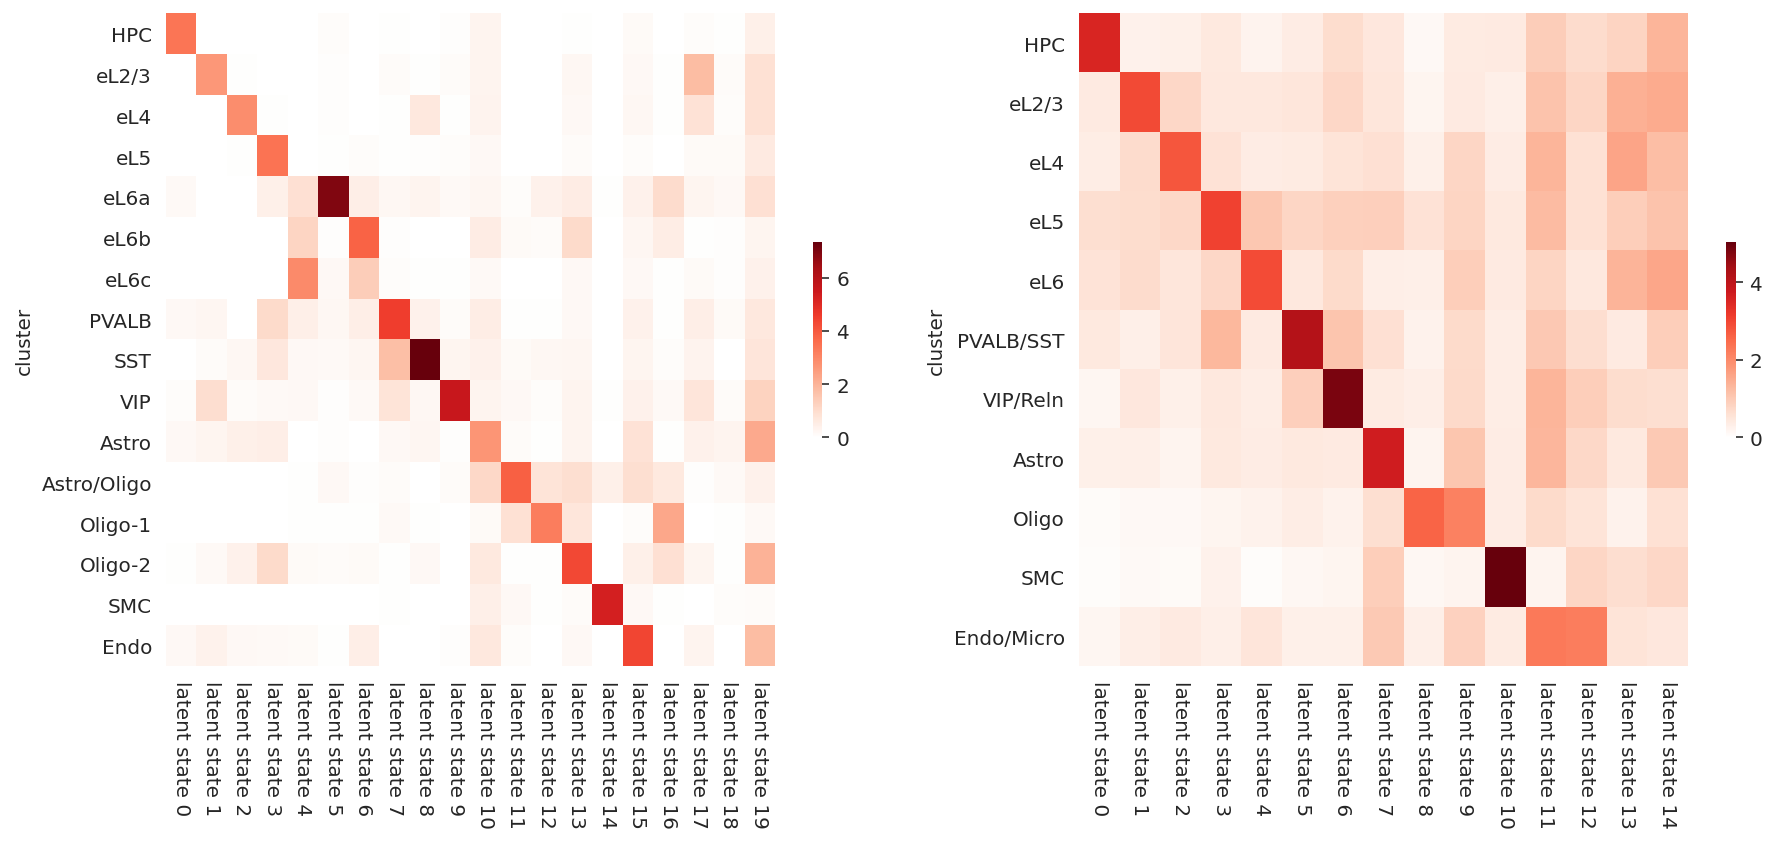

In [14]:
segmentdata = copy.deepcopy(plt.get_cmap('Reds')._segmentdata)
segmentdata['red'  ][0] = (0., 1., 1.)
segmentdata['green'][0] = (0., 1., 1.)
segmentdata['blue' ][0] = (0., 1., 1.)
cm = matplotlib.colors.LinearSegmentedColormap('', segmentdata=segmentdata, N=256)
kwargs=dict(
    cmap=cm,
)

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
obj_SpiceMix.visualizeFeatureEnrichment(
    axes[0], **kwargs, ignores_y=['NA'],
    normalizer_raw=StandardScaler(with_mean=False).fit_transform,
)
obj_NMF     .visualizeFeatureEnrichment(
    axes[1], **kwargs,
    normalizer_raw=StandardScaler(with_mean=False).fit_transform,
)

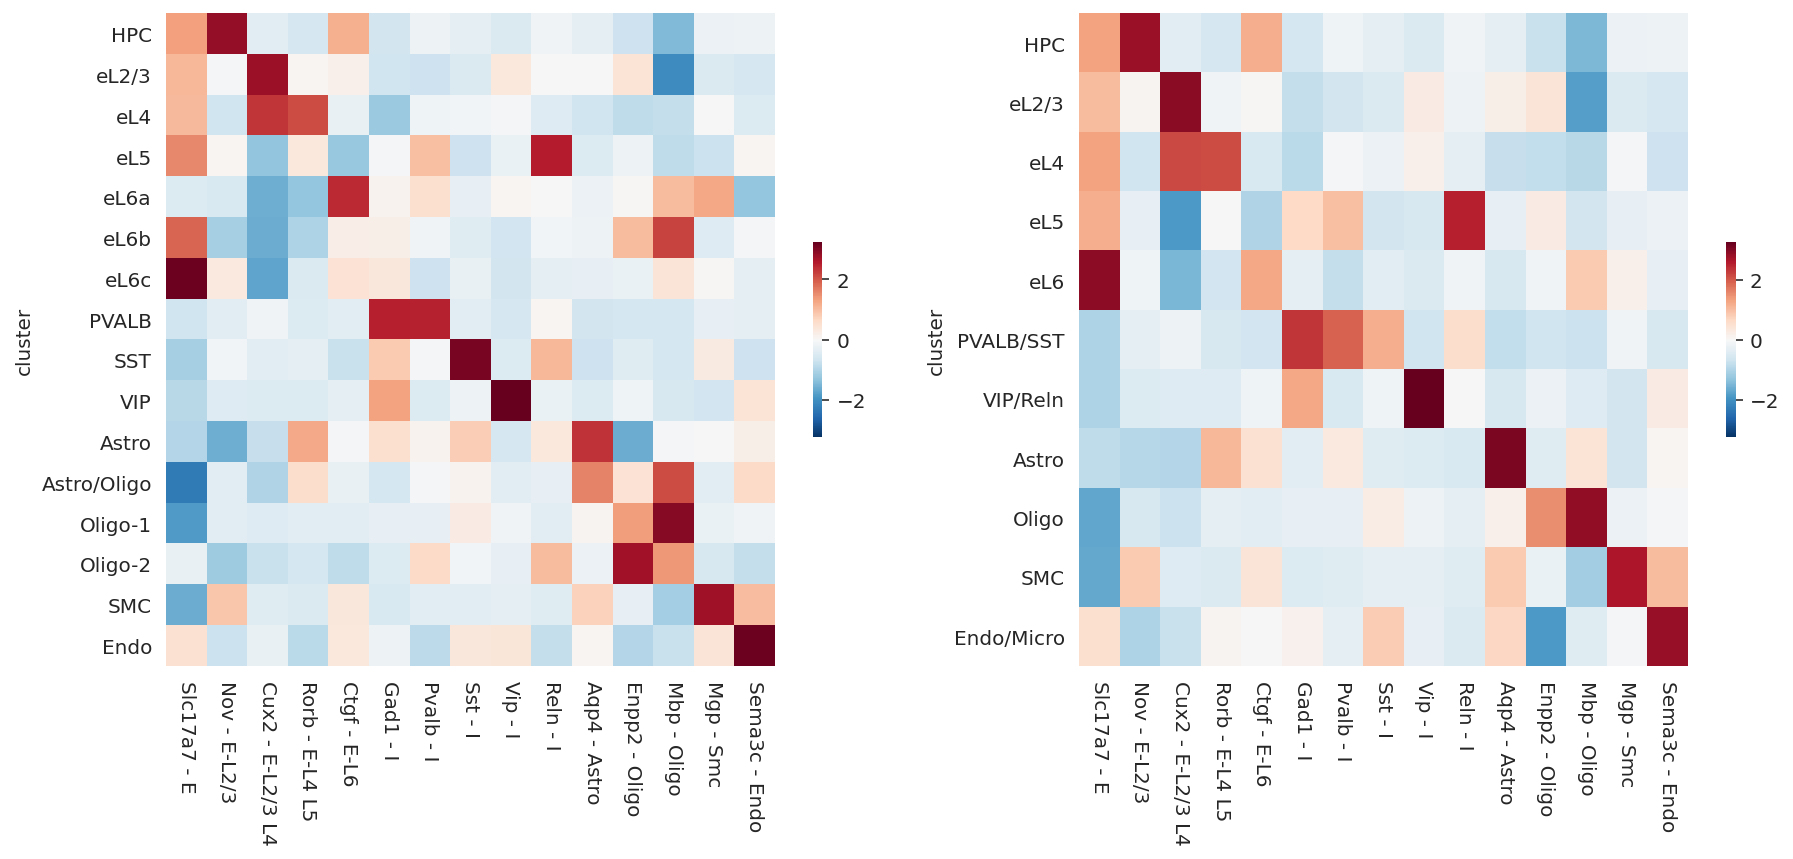

In [15]:
segmentdata = copy.deepcopy(plt.get_cmap('RdBu')._segmentdata)
for key in ['red', 'green', 'blue']:
    segmentdata[key] = [(1.-i, k, j) for (i, j, k) in segmentdata[key][::-1]]
cm = matplotlib.colors.LinearSegmentedColormap('', segmentdata=segmentdata, N=256)
kwargs=dict(
    cmap=cm,
)

# In the first column are the gene IDs, and in the second column are annotations, 
#   which are cell types in this example
gene_list_plot = np.array([
    ('Slc17a7',	'E'), # putative marker of all excitatory neural types
    ('Nov',		'E-L2/3'), # STARmap, Fig. 2J
    ('Cux2',	'E-L2/3 L4'), # STARmap, Fig. 2J
    ('Rorb',	'E-L4 L5'), # STARmap, Fig. 2J
    ('Ctgf',	'E-L6'), # STARmap, Fig. 2J & tasic
    
    ('Gad1',	'I'), # putative marker of all inhibitory neural types
    ('Pvalb',	'I'), # putative marker of PVALB subtype
    ('Sst',		'I'), # putative marker of SST subtype
    ('Vip',		'I'), # putative marker of VIP subtype
    ('Reln',	'I'),
    
    ('Aqp4',	'Astro'), # tasic
    ('Enpp2',	'Oligo'), # STARmap Fig. S6B
    ('Mbp',		'Oligo'), # tasic
    ('Mgp',		'Smc'), # STARmap Fig. S6B
    ('Sema3c',	'Endo'), # STARmap Fig. S6B
])
# Extract gene IDs and prepend string 'expr '
keys_x = [f'expr {_[0]}' for _ in gene_list_plot]

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
obj_SpiceMix.visualizeFeatureEnrichment(
    axes[0], keys_x=keys_x, **kwargs, ignores_y=['NA'],
    normalizer_raw=StandardScaler().fit_transform,
    normalizer_avg=lambda x: StandardScaler().fit_transform(x.T).T,
)
obj_NMF     .visualizeFeatureEnrichment(
    axes[1], keys_x=keys_x, **kwargs,
    normalizer_raw=StandardScaler().fit_transform,
    normalizer_avg=lambda x: StandardScaler().fit_transform(x.T).T,
)
for ax in axes:
    ax.set_xticklabels(' - '.join(_) for _ in gene_list_plot)

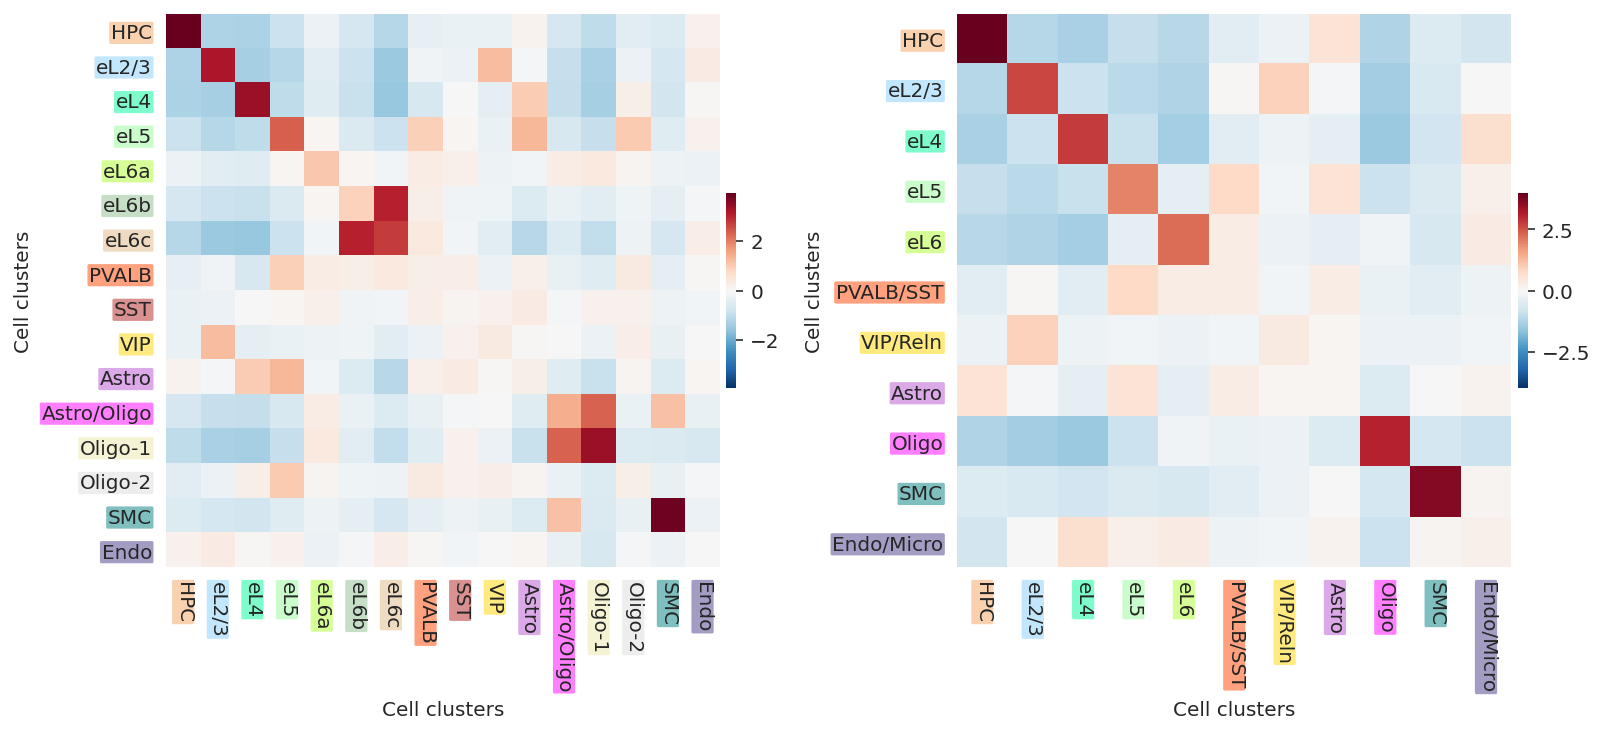

In [16]:
# plot the empirical affinity between cell types
segmentdata = copy.deepcopy(plt.get_cmap('RdBu')._segmentdata)
for channel in ['red', 'green', 'blue']:
    segmentdata[channel] = [(1.-i, k, j) for (i, j, k) in segmentdata[channel][::-1]]
cm = matplotlib.colors.LinearSegmentedColormap('', segmentdata=segmentdata, N=256)
kwargs = dict(
    cmap=cm,
)
fig, axes = plt.subplots(1, 2, figsize=(13, 6))
obj_SpiceMix.plotAffinityClusters(axes[0], ignores={'NA'}, **kwargs)
obj_NMF     .plotAffinityClusters(axes[1], ignores={'NA'}, **kwargs)

Iteration 200
Iteration 200


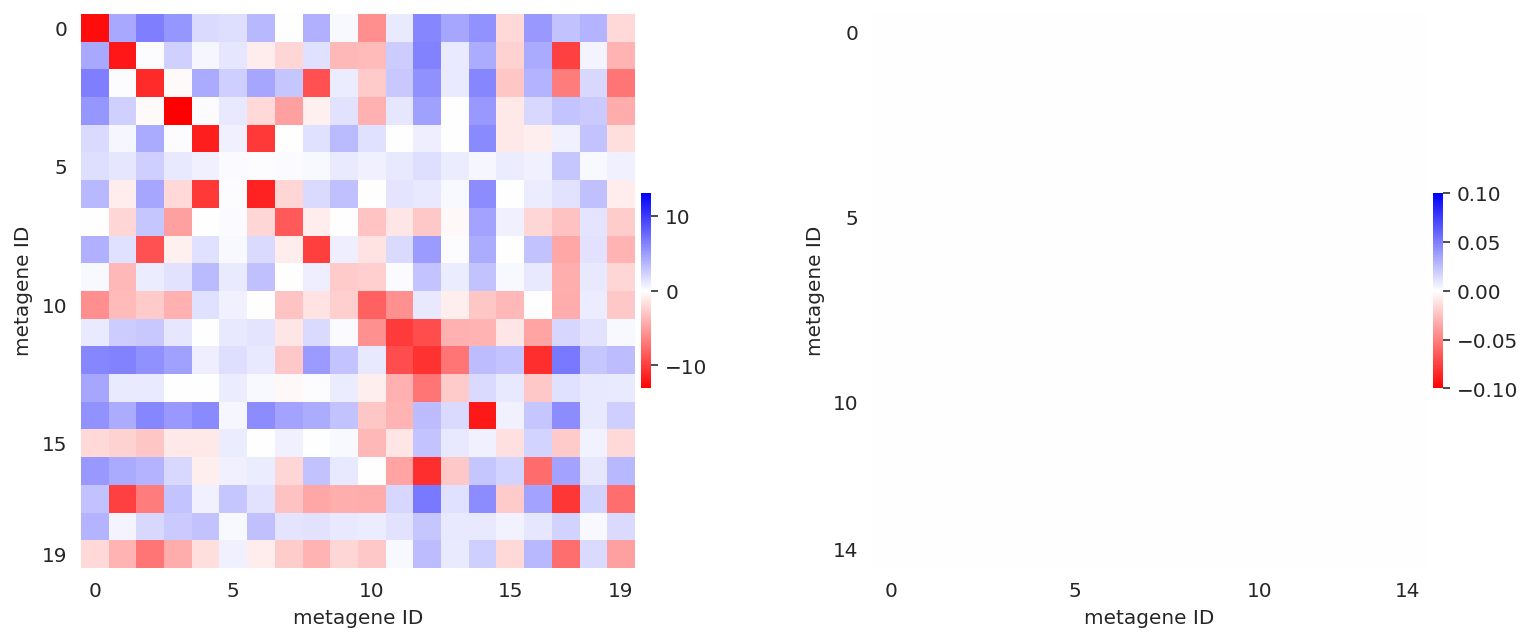

In [17]:
segmentdata = copy.deepcopy(plt.get_cmap('bwr')._segmentdata)
for key in ['red', 'green', 'blue']:
    segmentdata[key] = [(1.-i, k, j) for (i, j, k) in segmentdata[key][::-1]]
cm = matplotlib.colors.LinearSegmentedColormap('', segmentdata=segmentdata, N=256)
kwargs = dict(
    cmap=cm,
)

fig, axes = plt.subplots(1, 2, figsize=(13, 6))
obj_SpiceMix.plotAffinityMetagenes(axes[0], iteration=-1, **kwargs)